In [97]:
!gdown 1fc0UTcW5lz_-AxlUc6vFXzyeTvLwyFYd
!gdown 1C30wv3La95E_2kJWC0YNLl3sE0IEwn5e
!gdown 1Rl0sziy0pHaYB6wJE-rSZAtcA2b-uSKc

Downloading...
From: https://drive.google.com/uc?id=1fc0UTcW5lz_-AxlUc6vFXzyeTvLwyFYd
To: /content/mapping.csv
100% 23.0k/23.0k [00:00<00:00, 52.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C30wv3La95E_2kJWC0YNLl3sE0IEwn5e
To: /content/rounds2.csv
100% 11.8M/11.8M [00:00<00:00, 104MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1Rl0sziy0pHaYB6wJE-rSZAtcA2b-uSKc
To: /content/companies.txt
100% 8.96M/8.96M [00:00<00:00, 168MB/s]


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
rounds_df = pd.read_csv('rounds2.csv',encoding = 'latin1')

In [100]:
rounds_df.info()
rounds_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


(114949, 6)

In [101]:
companies_df = pd.read_csv('companies.txt',encoding='latin1',sep = '\t')
companies_df.info()
companies_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


(66368, 10)

In [102]:
companies_df.permalink.nunique()

66368

In [103]:
companies_df['permalink'] = companies_df['permalink'].str.lower()
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [104]:
companies_df.permalink.nunique()

66368

In [105]:
rounds_df.company_permalink.nunique()

90247

In [106]:
rounds_df['company_permalink'] = rounds_df['company_permalink'].str.lower()
rounds_df.company_permalink.nunique()

66370

In [107]:
rounds_df.loc[~rounds_df['company_permalink'].isin(companies_df['permalink']), :]


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [108]:
rounds_original_df = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
rounds_original_df.iloc[[29597, 31863, 45176, 58473], :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0


In [109]:
import chardet

rawdata = open('rounds2.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

MacRoman


In [110]:
print(result)


{'encoding': 'MacRoman', 'confidence': 0.7298941889747547, 'language': ''}


In [111]:
rounds_df['company_permalink'] = rounds_df.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds_df.loc[~rounds_df['company_permalink'].isin(companies_df['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
...,...,...,...,...,...,...
110545,/organization/whodats-spaces,/funding-round/d5d6db3d1e6c54d71a63b3aa0c9278e6,seed,NaN,28-10-2014,30000.0
113839,/organization/zengame-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [112]:
rounds_df.company_permalink.nunique()


66368

In [113]:
companies_df.loc[~companies_df['permalink'].isin(rounds_df['company_permalink']), :]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
...,...,...,...,...,...,...,...,...,...,...
63833,/organization/whodatâs-spaces,Whodatâs Spaces,NaN,Apps,operating,NaN,NaN,NaN,NaN,NaN
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [114]:
companies_df['permalink'] = companies_df.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [115]:
companies_df.loc[~companies_df['permalink'].isin(rounds_df['company_permalink']), :]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [116]:
companies_df.isnull().sum()

,0
permalink,0
name,1
homepage_url,5058
category_list,3148
status,0
country_code,6958
state_code,8547
region,8030
city,8028
founded_at,15221


In [117]:
rounds_df.isnull().sum()


,0
company_permalink,0
funding_round_permalink,0
funding_round_type,0
funding_round_code,83809
funded_at,0
raised_amount_usd,19990


In [118]:
company_round_df = pd.merge(companies_df, rounds_df, how="inner", left_on="permalink", right_on="company_permalink")
company_round_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [119]:
company_round_df = company_round_df.drop('company_permalink', axis=1)
company_round_df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [120]:
company_round_df.isnull().sum()


,0
permalink,0
name,1
homepage_url,6134
category_list,3410
status,0
country_code,8678
state_code,10946
region,10167
city,10164
founded_at,20521


In [121]:
round(100*(company_round_df.isnull().sum()/len(company_round_df.index)),2)


,0
permalink,0.00
name,0.00
homepage_url,5.34
category_list,2.97
status,0.00
country_code,7.55
state_code,9.52
region,8.84
city,8.84
founded_at,17.85


In [122]:
company_round_df = company_round_df.drop(['funding_round_code', 'homepage_url','founded_at', 'state_code', 'region', 'city'], axis=1)
company_round_df.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

In [123]:
round(100*((company_round_df.isnull().sum())/len(company_round_df.index)),2)


,0
permalink,0.00
name,0.00
category_list,2.97
status,0.00
country_code,7.55
funding_round_permalink,0.00
funding_round_type,0.00
funded_at,0.00
raised_amount_usd,17.39


In [124]:
company_round_df['raised_amount_usd'].describe()


,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [125]:
company_round_df = company_round_df[~np.isnan(company_round_df['raised_amount_usd'])]
round(100*(company_round_df.isnull().sum()/len(company_round_df.index)),2)

,0
permalink,0.00
name,0.00
category_list,1.10
status,0.00
country_code,6.16
funding_round_permalink,0.00
funding_round_type,0.00
funded_at,0.00
raised_amount_usd,0.00


In [126]:
country_codes = company_round_df['country_code']
country_codes.value_counts()

,count
country_code,
USA,62049
GBR,5019
CAN,2616
CHN,1927
IND,1649
...,...
LAO,1
MKD,1
SOM,1


In [127]:
round(100*(company_round_df['country_code'].value_counts()/len(company_round_df.index)),2)

,count
country_code,
USA,65.34
GBR,5.29
CAN,2.75
CHN,2.03
IND,1.74
...,...
LAO,0.00
MKD,0.00
SOM,0.00


In [128]:
company_round_df = company_round_df[~pd.isnull(company_round_df['country_code'])]

round(100*(company_round_df.isnull().sum()/len(company_round_df.index)),2)

,0
permalink,0.00
name,0.00
category_list,0.65
status,0.00
country_code,0.00
funding_round_permalink,0.00
funding_round_type,0.00
funded_at,0.00
raised_amount_usd,0.00


In [129]:
### funding type analysis

In [130]:
company_round_df = company_round_df[(company_round_df.funding_round_type == "venture") |
        (company_round_df.funding_round_type == "angel") |
        (company_round_df.funding_round_type == "seed") |
        (company_round_df.funding_round_type == "private_equity")]

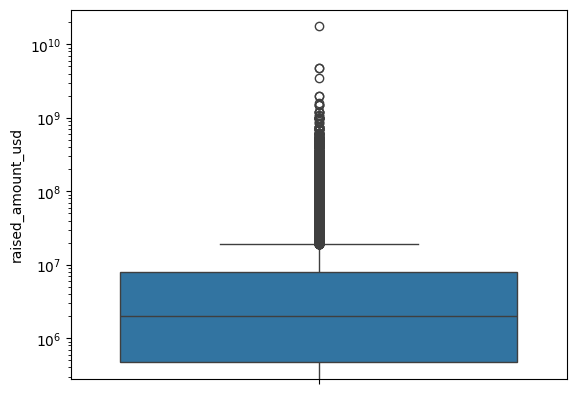

In [131]:
sns.boxplot(y=company_round_df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [132]:
company_round_df['raised_amount_usd'].describe()


,raised_amount_usd
count,7.560600e+04
mean,9.521499e+06
std,7.769188e+07
min,0.000000e+00
25%,4.700000e+05
50%,2.000000e+06
75%,8.000000e+06
max,1.760000e+10


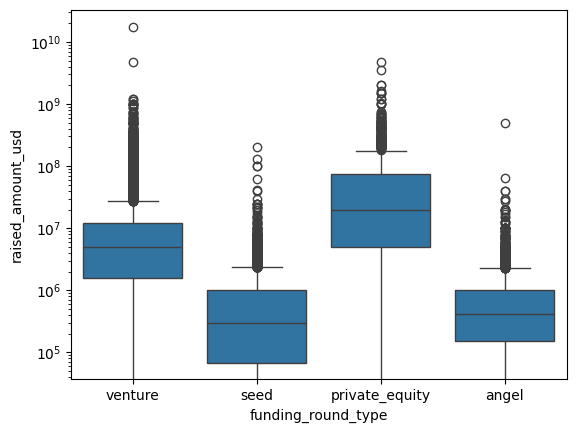

In [133]:
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=company_round_df)
plt.yscale('log')
plt.show()

In [134]:
company_round_df.pivot_table(values="raised_amount_usd", columns="funding_round_type", aggfunc=[np.median, np.mean])

<ipython-input-134-fdc916c4b52f>:1: FutureWarning: The provided callable <function median at 0x7c939511b060> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  company_round_df.pivot_table(values="raised_amount_usd", columns="funding_round_type", aggfunc=[np.median, np.mean])
<ipython-input-134-fdc916c4b52f>:1: FutureWarning: The provided callable <function mean at 0x7c93983e9da0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  company_round_df.pivot_table(values="raised_amount_usd", columns="funding_round_type", aggfunc=[np.median, np.mean])


median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   410737.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   968559.909645   7.361856e+07  748104.498187  1.173578e+07

In [135]:
company_round_df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

,raised_amount_usd
funding_round_type,
private_equity,20000000.0
venture,5000000.0
angel,410737.0
seed,300000.0


In [136]:
### country analysis

In [137]:
company_round_df = company_round_df[company_round_df.funding_round_type == 'venture']



In [138]:
country_wise_total_investment = company_round_df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total_investment)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64


In [139]:
top_9_countries = country_wise_total_investment[:9]
print(top_9_countries)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64


In [140]:
company_round_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48111 entries, 0 to 114941
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                48111 non-null  object 
 1   name                     48111 non-null  object 
 2   category_list            47809 non-null  object 
 3   status                   48111 non-null  object 
 4   country_code             48111 non-null  object 
 5   funding_round_permalink  48111 non-null  object 
 6   funding_round_type       48111 non-null  object 
 7   funded_at                48111 non-null  object 
 8   raised_amount_usd        48111 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.7+ MB


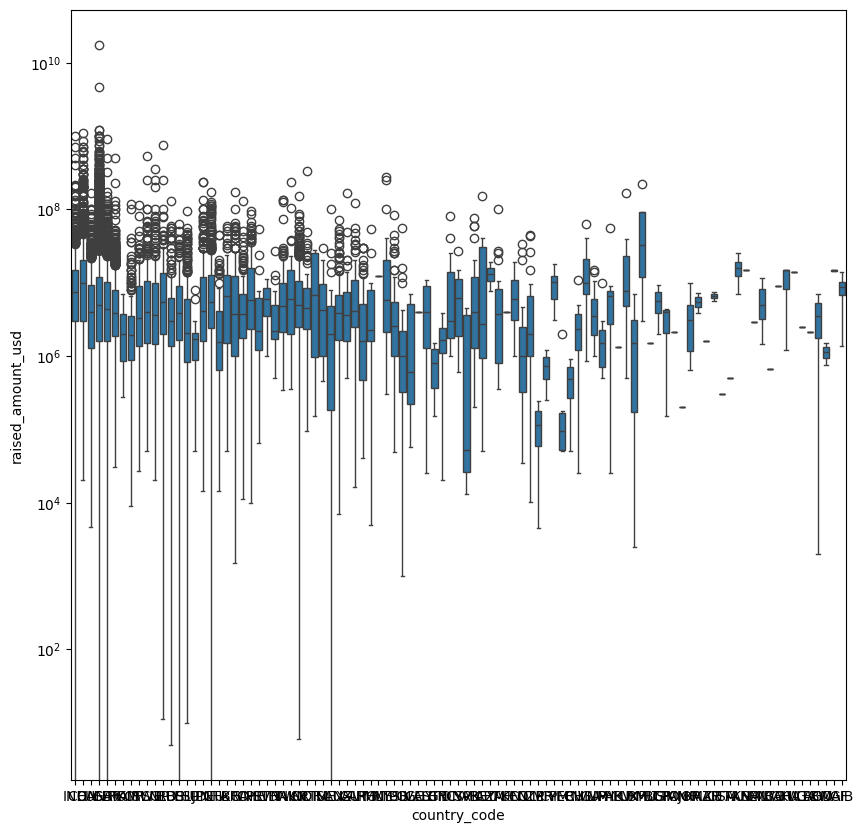

In [141]:
plt.figure(figsize=(10,10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=company_round_df)
plt.yscale('log')
plt.show()

In [142]:
### sector analysis

In [145]:
company_round_df['main_category'] = company_round_df['category_list'].apply(lambda x: x.split("|")[0] if isinstance(x, str) else None)
company_round_df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics


In [146]:
company_round_df = company_round_df.drop('category_list', axis=1)
company_round_df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
4,/organization/0-6-com,0-6.com,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology
10,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics


In [148]:
mapping = pd.read_csv('mapping.csv', sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [149]:
mapping.isnull().sum()

,0
category_list,1
Automotive & Sports,0
Blanks,0
Cleantech / Semiconductors,0
Entertainment,0
Health,0
Manufacturing,0
"News, Search and Messaging",0
Others,0
"Social, Finance, Analytics, Advertising",0


In [150]:
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

,0
category_list,0
Automotive & Sports,0
Blanks,0
Cleantech / Semiconductors,0
Entertainment,0
Health,0
Manufacturing,0
"News, Search and Messaging",0
Others,0
"Social, Finance, Analytics, Advertising",0


In [151]:
print(mapping.head())

      category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
1                3D                    0       0                           0   
2       3D Printing                    0       0                           0   
3     3D Technology                    0       0                           0   
4        Accounting                    0       0                           0   
5  Active Lifestyle                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   
5              0       1              0                           0       0   

   Social, Finance, Analytics, Advertising  

In [152]:
print(company_round_df.head())

                              permalink                    name     status  \
0                   /organization/-fame                   #fame  operating   
4                 /organization/0-6-com                 0-6.com  operating   
8   /organization/0ndine-biomedical-inc  Ondine Biomedical Inc.  operating   
10                 /organization/0xdata                  H2O.ai  operating   
11                 /organization/0xdata                  H2O.ai  operating   

   country_code                          funding_round_permalink  \
0           IND  /funding-round/9a01d05418af9f794eebff7ace91f638   
4           CHN  /funding-round/5727accaeaa57461bd22a9bdd945382d   
8           CAN  /funding-round/954b9499724b946ad8c396a57a5f3b72   
10          USA  /funding-round/3bb2ee4a2d89251a10aaa735b1180e44   
11          USA  /funding-round/ae2a174c06517c2394aed45006322a7e   

   funding_round_type   funded_at  raised_amount_usd  main_category  
0             venture  05-01-2015         10000000.0

In [153]:
print(mapping['category_list'])

1                    3D
2           3D Printing
3         3D Technology
4            Accounting
5      Active Lifestyle
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 687, dtype: object


In [154]:
# values in main category column in company_round_df which are not present in category list column in mapping file
company_round_df[~company_round_df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
10,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
61,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,Analytics
99,/organization/123feng-com,123Feng.Com,operating,CHN,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,27-10-2015,13000000.0,None
...,...,...,...,...,...,...,...,...,...
114660,/organization/zopa,Zopa,operating,GBR,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,Finance
114661,/organization/zopa,Zopa,operating,GBR,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,Finance
114663,/organization/zopa,Zopa,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,Finance
114664,/organization/zopa,Zopa,operating,GBR,/funding-round/720b9f244c1f4d4fed63361d3bb0aa22,venture,01-01-2005,1000000.0,Finance


In [155]:
mapping[~mapping['category_list'].isin(company_round_df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,Air Pollution Control,0,0,1,0,0,0,0,0,0
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
33,Aquaculture,0,0,1,0,0,0,0,0,0
59,Big Data A0lytics,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,Virtual Workforces,0,0,0,1,0,0,0,0,0
672,Waste Ma0gement,0,0,1,0,0,0,0,0,0
682,Weddings,0,0,0,1,0,0,0,0,0
683,Wholesale,0,0,0,0,0,0,0,1,0


In [156]:
mapping['category_list'] = mapping['category_list'].apply(lambda x:x.replace('0', 'na'))
print(mapping['category_list'])

1                    3D
2           3D Printing
3         3D Technology
4            Accounting
5      Active Lifestyle
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 687, dtype: object


In [157]:
comp_round_map = pd.merge(company_round_df, mapping, how='inner', left_on="main_category", right_on="category_list")

In [158]:
comp_round_map.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Media,0,0,0,1,0,0,0,0,0
1,/organization/0-6-com,0-6.com,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web,Curated Web,0,0,0,0,0,0,1,0,0
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology,Biotechnology,0,0,1,0,0,0,0,0,0
3,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics,Analytics,0,0,0,0,0,0,0,0,1
4,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics,Analytics,0,0,0,0,0,0,0,0,1


In [159]:
comp_round_map = comp_round_map.drop('category_list', axis=1)

In [160]:
comp_round_map.head()


,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,0,0,0,1,0,0,0,0,0
1,/organization/0-6-com,0-6.com,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web,0,0,0,0,0,0,1,0,0
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology,0,0,1,0,0,0,0,0,0
3,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics,0,0,0,0,0,0,0,0,1
4,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics,0,0,0,0,0,0,0,0,1


In [161]:
comp_round_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47619 entries, 0 to 47618
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                47619 non-null  object 
 1   name                                     47619 non-null  object 
 2   status                                   47619 non-null  object 
 3   country_code                             47619 non-null  object 
 4   funding_round_permalink                  47619 non-null  object 
 5   funding_round_type                       47619 non-null  object 
 6   funded_at                                47619 non-null  object 
 7   raised_amount_usd                        47619 non-null  float64
 8   main_category                            47619 non-null  object 
 9   Automotive & Sports                      47619 non-null  int64  
 10  Blanks                                   47619

In [162]:
value_vars = comp_round_map.columns[9:18]


id_vars = np.setdiff1d(comp_round_map.columns, value_vars)

print(value_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')


In [163]:
print(id_vars)

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [164]:

long_comp_round_map_df = pd.melt(comp_round_map,
        id_vars=list(id_vars),
        value_vars=list(value_vars))

long_comp_round_map_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,Media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,CHN,19-03-2008,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,Curated Web,0-6.com,/organization/0-6-com,2000000.0,operating,Automotive & Sports,0
2,CAN,21-12-2009,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,Biotechnology,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc,719491.0,operating,Automotive & Sports,0
3,USA,09-11-2015,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,Analytics,H2O.ai,/organization/0xdata,20000000.0,operating,Automotive & Sports,0
4,USA,03-01-2013,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,Analytics,H2O.ai,/organization/0xdata,1700000.0,operating,Automotive & Sports,0


In [165]:
long_comp_round_map_df = long_comp_round_map_df[long_comp_round_map_df['value']==1]
long_comp_round_map_df = long_comp_round_map_df.drop('value', axis=1)
long_comp_round_map_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable
167,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,Drones,3D Robotics,/organization/3d-robotics,5000000.0,operating,Automotive & Sports
168,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,Drones,3D Robotics,/organization/3d-robotics,14000000.0,operating,Automotive & Sports
169,USA,12-09-2013,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,Drones,3D Robotics,/organization/3d-robotics,30000000.0,operating,Automotive & Sports
170,USA,25-02-2015,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,Drones,3D Robotics,/organization/3d-robotics,50000000.0,operating,Automotive & Sports
186,USA,16-01-2015,/funding-round/db1213a3ff5f9e74f756e4b5c6772f5a,venture,Automated Kiosk,3FLOZ,/organization/3floz-com,637500.0,operating,Automotive & Sports


In [166]:
long_comp_round_map_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47619 entries, 167 to 428559
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_code             47619 non-null  object 
 1   funded_at                47619 non-null  object 
 2   funding_round_permalink  47619 non-null  object 
 3   funding_round_type       47619 non-null  object 
 4   main_category            47619 non-null  object 
 5   name                     47619 non-null  object 
 6   permalink                47619 non-null  object 
 7   raised_amount_usd        47619 non-null  float64
 8   status                   47619 non-null  object 
 9   variable                 47619 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.0+ MB


In [167]:
long_comp_round_map_df = long_comp_round_map_df.rename(columns={'variable':'sector'})

In [168]:
filtered_df = long_comp_round_map_df[(long_comp_round_map_df['raised_amount_usd'] >= 5000000) & (long_comp_round_map_df['raised_amount_usd'] <= 15000000)]

In [169]:
filtered_df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count         sum
country_code sector                                                    
ARE          Cleantech / Semiconductors                   1  12000000.0
             Health                                       1  10000000.0
             News, Search and Messaging                   1   5000000.0
             Others                                       2  24000000.0
             Social, Finance, Analytics, Advertising      2  10250000.0
...                                                     ...         ...
VNM          Manufacturing                                1   5400000.0
             News, Search and Messaging                   1  14000000.0
ZAF          Health                                       1  10400000.0
             Others                                       1   6030000.0
             Social, Finance, Analytics, Advertising      3  21550000.0

[295 rows x 2 columns]

<ipython-input-170-c962698b8422>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(p.get_xticklabels(),rotation=30)
<ipython-input-170-c962698b8422>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  q.set_xticklabels(q.get_xticklabels(),rotation=30)


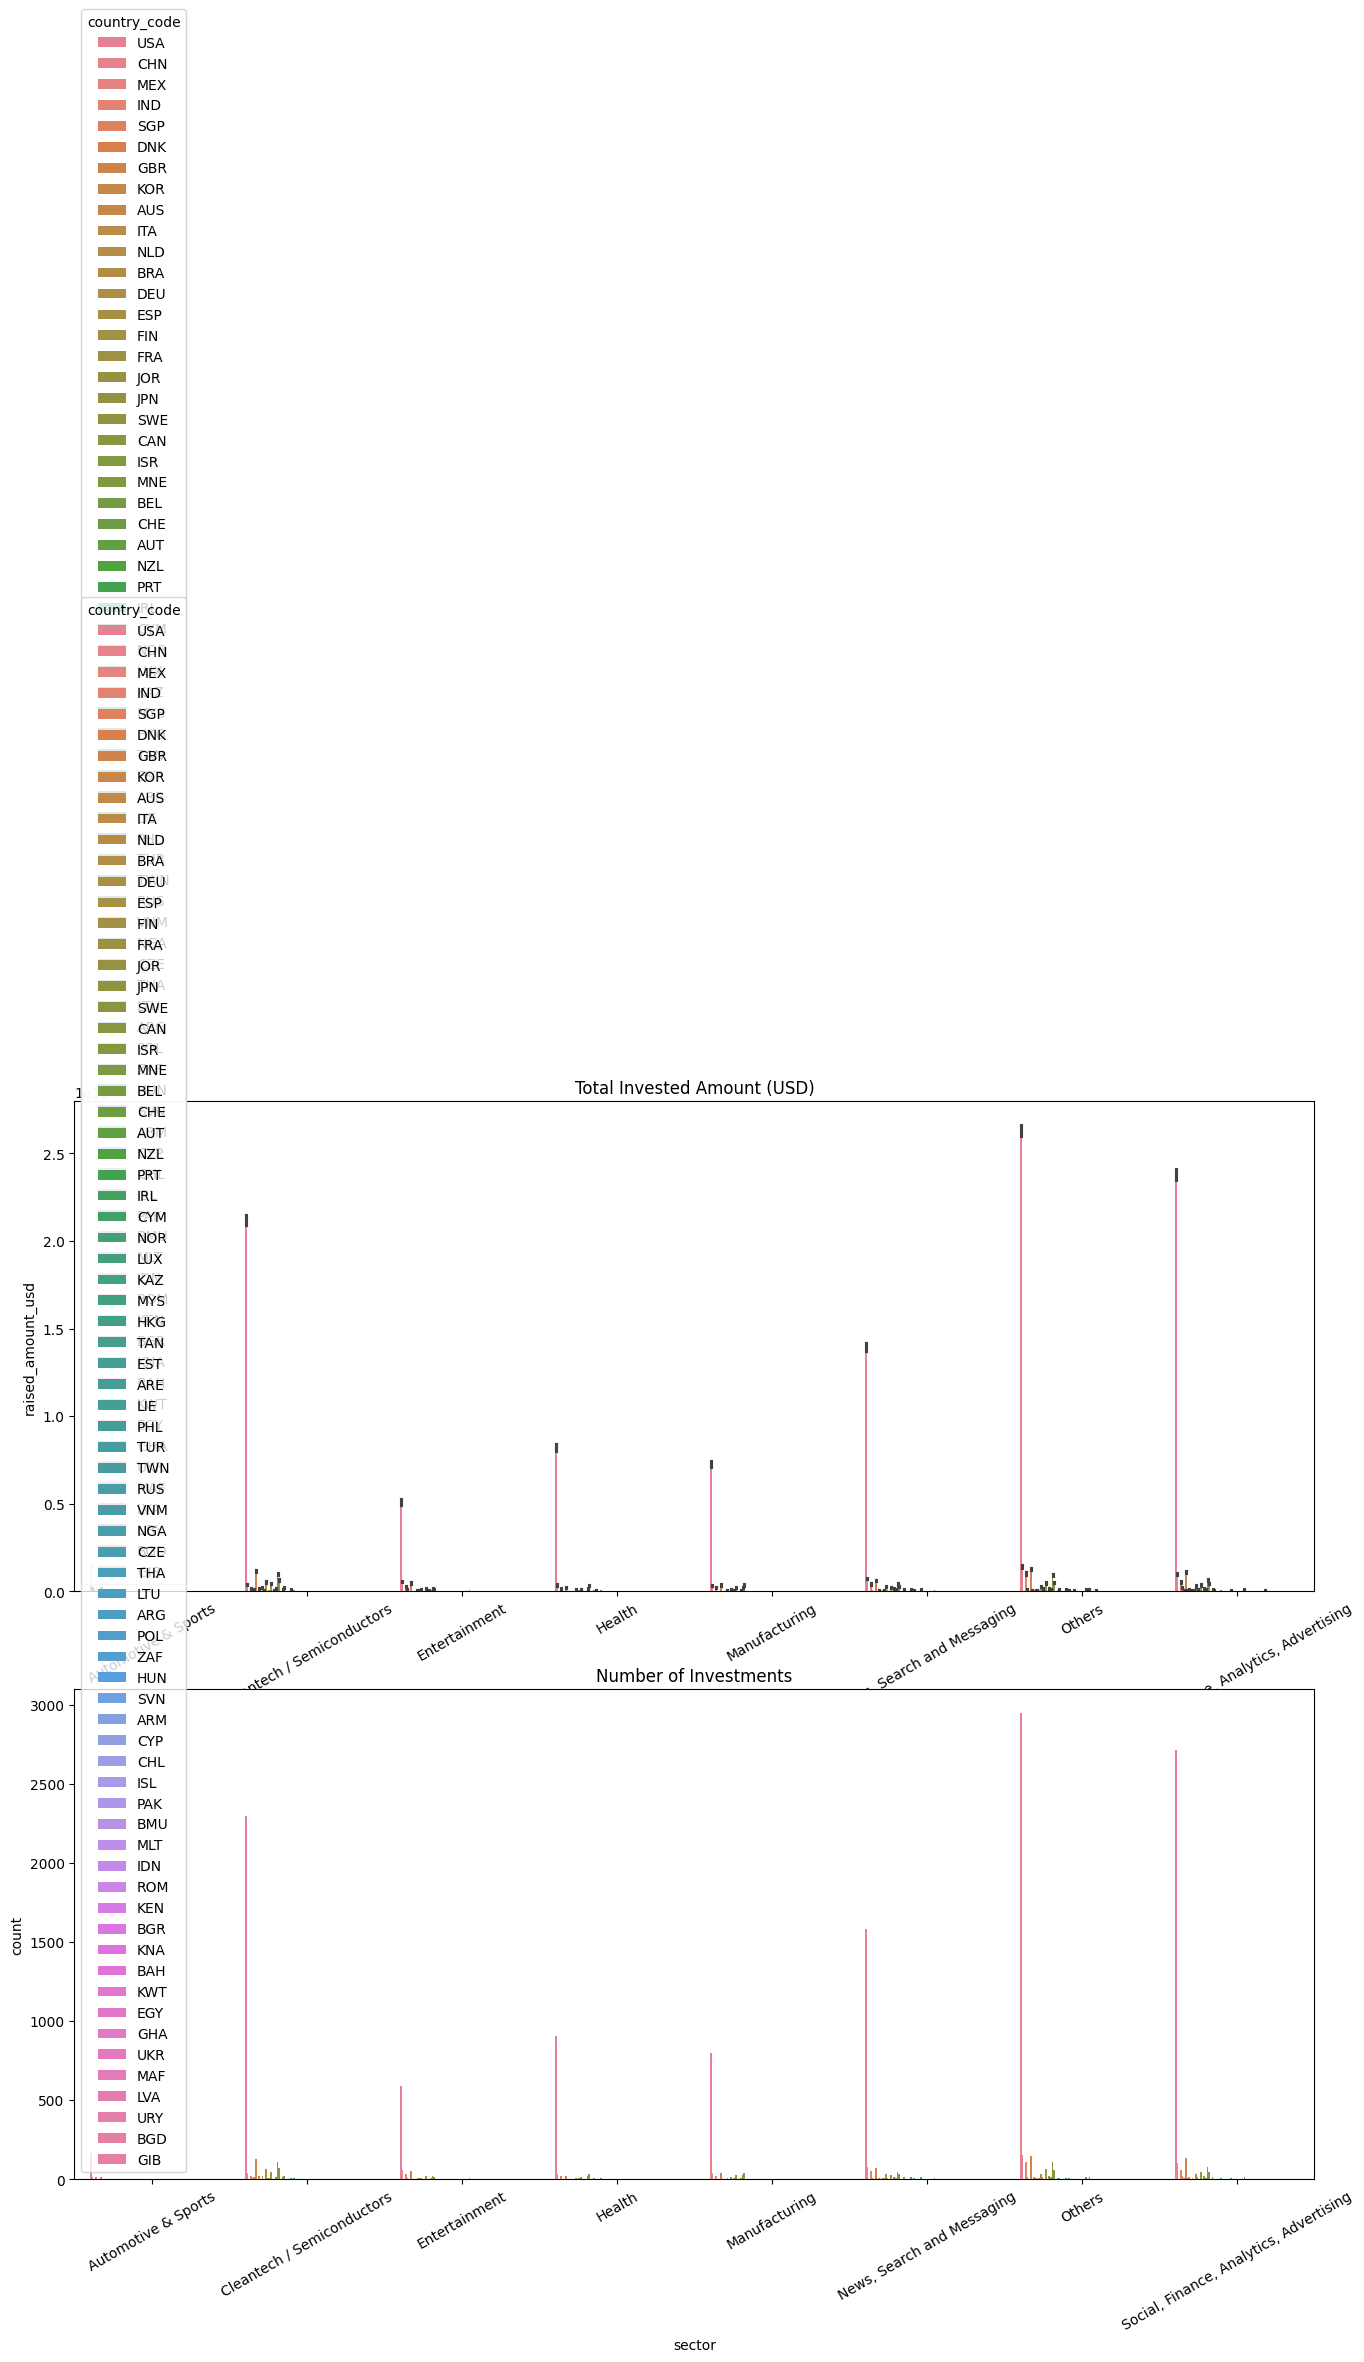

In [170]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=filtered_df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=filtered_df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()

In [171]:
###Thus, the top country in terms of the number of investments (and the total amount invested) is the USA. The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.

###In case you don't want to consider 'Others' as a sector, 'News, Search and Messaging' is the next best sector